In [58]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [59]:
df = pd.read_csv('shopping_trends.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [60]:

df.duplicated().sum()

0

In [61]:
# Check if all values in the column Review Rating are within the specified range
condition = (df['Review Rating'] > 5) | (df['Review Rating'] < 0)


In [62]:
# delete rows out side the valid range
df = df[~condition]


In [63]:
#Removing Unneccesary columns
df.drop(columns={'Customer ID'},inplace=True)

In [64]:
#Finding Numerical Columns
num_col=[]
for col in df.columns:
    if(df[col].dtypes!='object'):
        num_col.append(col)
print(f"There are total {len(num_col)} numerical columns in dataset")
print(num_col)

There are total 4 numerical columns in dataset
['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']


In [65]:
cat_col=[]
for col  in df.columns:
    if(df[col].dtypes=='object'):
        cat_col.append(col)
print(f"There are total {len(cat_col)} categorical columns in dataset")
print(cat_col)

There are total 14 categorical columns in dataset
['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']



univariate Analysis
Summary Statistics
Frequency Table
Charts

In [66]:
df['Gender'].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [67]:
df['Location'].value_counts()

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Ariz

In [68]:

df['Item Purchased'].value_counts()

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

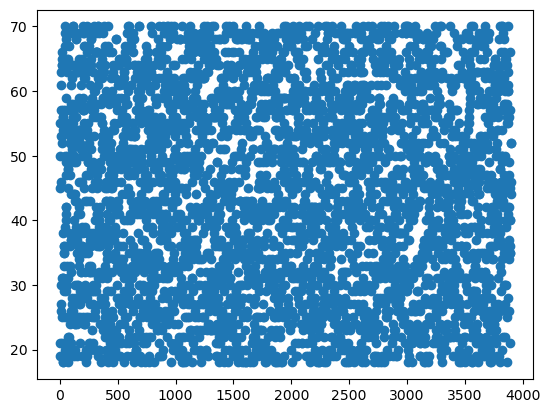

In [69]:

plt.scatter(df.index,df['Age'])
plt.show()

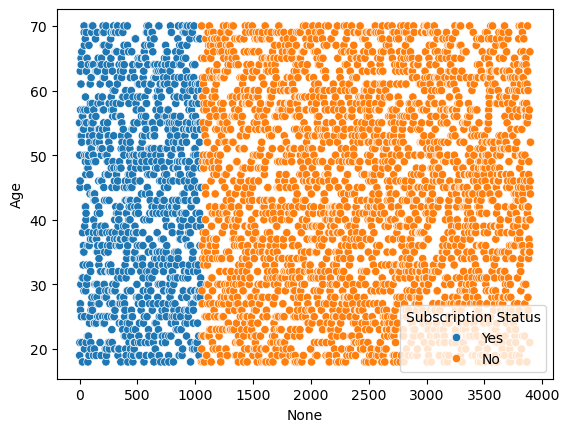

In [70]:
sns.scatterplot(x=df.index, y=df['Age'],hue=df['Subscription Status'])
plt.show()

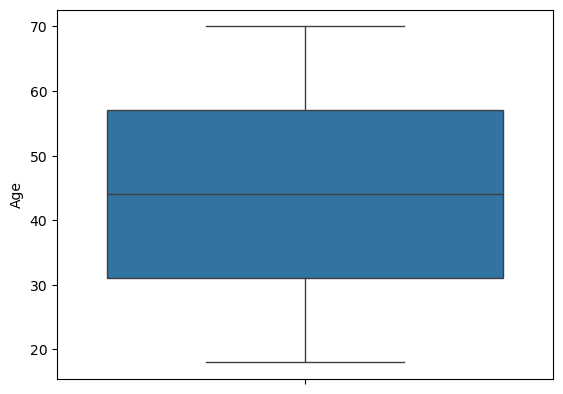

In [71]:

sns.boxplot(df['Age'])
plt.show()

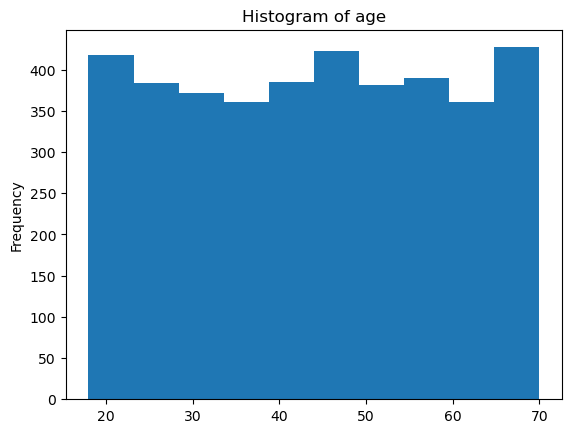

In [72]:
df["Age"].plot(kind ="hist")
plt.title("Histogram of age")
plt.show()

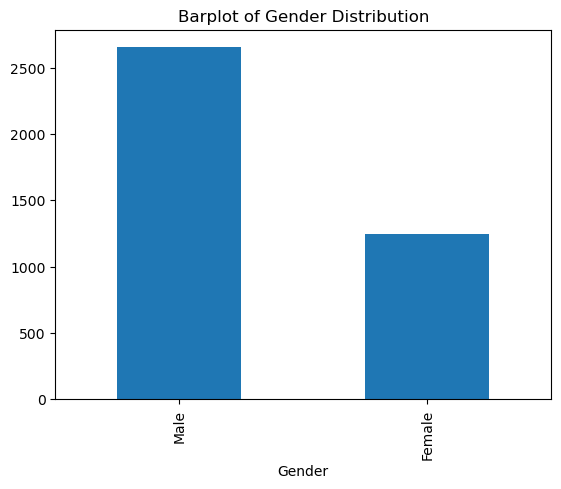

In [73]:
df["Gender"].value_counts().plot(kind ="bar")
plt.title("Barplot of Gender Distribution")
plt.show()

In [74]:
location_groups = df.groupby("Location")

In [75]:
# Analyze regional trends
for location, location_data in location_groups:
    print(f"Regional Trends for {location}:")

    # Calculate average purchase amount in this region
    avg_purchase_amount = location_data["Purchase Amount (USD)"].mean()
    print(f"Average Purchase Amount: ${avg_purchase_amount:.2f}")

    # Count the most popular product categories in this region
    popular_categories = location_data["Category"].value_counts().idxmax()
    print(f"Most Popular Category: {popular_categories}")
    
    
    print("\n")


Regional Trends for Alabama:
Average Purchase Amount: $59.11
Most Popular Category: Clothing


Regional Trends for Alaska:
Average Purchase Amount: $67.60
Most Popular Category: Clothing


Regional Trends for Arizona:
Average Purchase Amount: $66.55
Most Popular Category: Clothing


Regional Trends for Arkansas:
Average Purchase Amount: $61.11
Most Popular Category: Clothing


Regional Trends for California:
Average Purchase Amount: $59.00
Most Popular Category: Clothing


Regional Trends for Colorado:
Average Purchase Amount: $56.29
Most Popular Category: Clothing


Regional Trends for Connecticut:
Average Purchase Amount: $54.18
Most Popular Category: Clothing


Regional Trends for Delaware:
Average Purchase Amount: $55.33
Most Popular Category: Clothing


Regional Trends for Florida:
Average Purchase Amount: $55.85
Most Popular Category: Clothing


Regional Trends for Georgia:
Average Purchase Amount: $58.80
Most Popular Category: Clothing


Regional Trends for Hawaii:
Average Purch

In [76]:
 # Analyze online shopping preferences
 # Analyze online shopping preferences
online_shopping = location_data["Shipping Type"].apply(lambda x: "Online" if "Express" in x or "Standard" in x else "Offline")
online_percentage = (online_shopping.value_counts() / len(online_shopping)) * 100
print(f"Online Shopping Preference:")
print(online_percentage)

    # Consider other factors based on your data and business context

print("\n")

Online Shopping Preference:
Shipping Type
Offline    66.197183
Online     33.802817
Name: count, dtype: float64




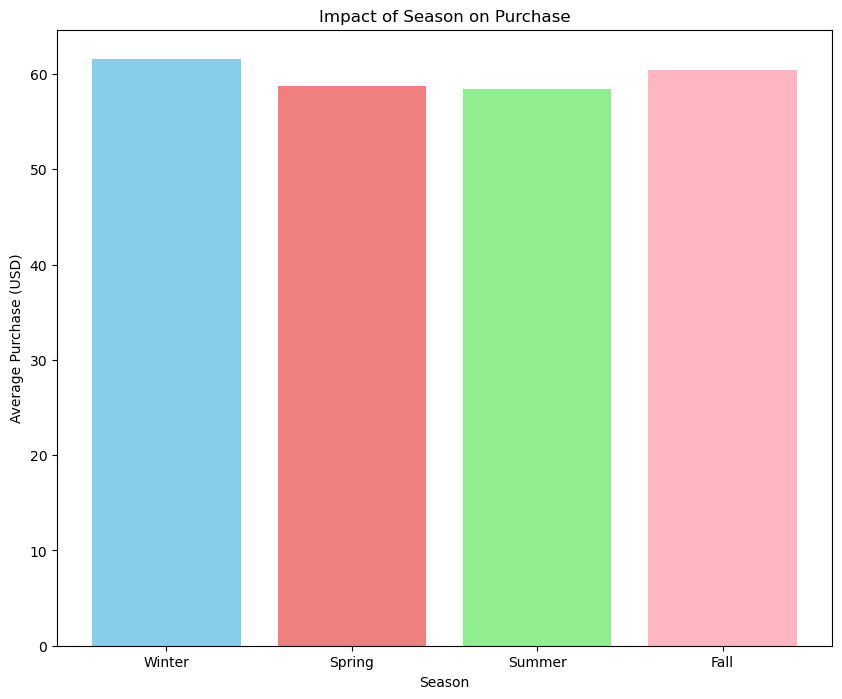

In [77]:
seasons = df['Season'].unique()
average_purchase_by_season = df.groupby('Season')['Purchase Amount (USD)'].mean()

plt.figure(figsize=(10, 8))
plt.bar(seasons, average_purchase_by_season, color=['skyblue', 'lightcoral', 'lightgreen', 'lightpink'])
plt.title("Impact of Season on Purchase")
plt.xlabel("Season")
plt.ylabel("Average Purchase (USD)")
plt.show()


In [78]:
df.sort_values("Review Rating",ascending = False,inplace = True)

In [79]:
df

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
776,49,Male,Shirt,Clothing,60,Alabama,M,Maroon,Spring,5.0,Yes,PayPal,Standard,Yes,Yes,8,Venmo,Every 3 Months
1664,19,Male,Handbag,Accessories,53,Minnesota,M,Purple,Spring,5.0,No,PayPal,Next Day Air,Yes,Yes,35,PayPal,Weekly
1277,19,Male,Blouse,Clothing,97,Rhode Island,L,Green,Spring,5.0,No,Debit Card,Express,Yes,Yes,5,Venmo,Quarterly
2632,24,Male,Scarf,Accessories,27,Alaska,M,Black,Fall,5.0,No,Venmo,Next Day Air,No,No,14,Cash,Annually
965,43,Male,Boots,Footwear,55,Delaware,L,Black,Spring,5.0,Yes,Debit Card,Store Pickup,Yes,Yes,10,Credit Card,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,54,Male,Jacket,Outerwear,34,Utah,M,Maroon,Fall,2.5,No,Venmo,Next Day Air,Yes,Yes,35,PayPal,Quarterly
3473,63,Female,Dress,Clothing,40,Kansas,M,Cyan,Spring,2.5,No,Credit Card,Express,No,No,11,Cash,Weekly
1449,18,Male,Socks,Clothing,41,New York,L,Lavender,Winter,2.5,No,Debit Card,Store Pickup,Yes,Yes,20,Cash,Every 3 Months
133,52,Male,Sweater,Clothing,65,Montana,M,Violet,Winter,2.5,Yes,Bank Transfer,Next Day Air,Yes,Yes,25,Venmo,Annually


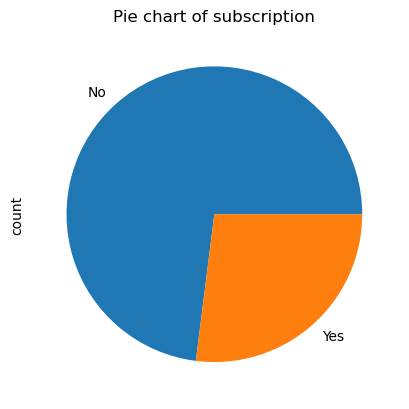

In [80]:
df['Subscription Status'].value_counts().plot(kind ="pie")
plt.title("Pie chart of subscription")
plt.show()

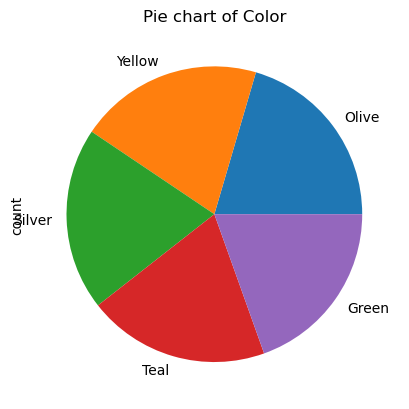

In [81]:
df['Color'].value_counts().head().plot(kind ="pie")
plt.title("Pie chart of Color")
plt.show()

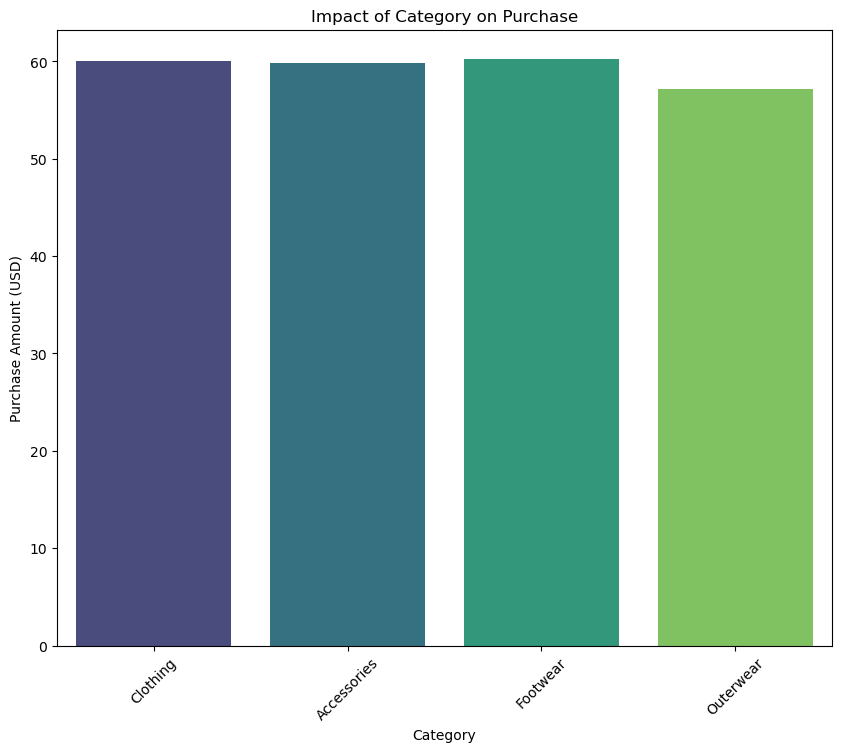

In [82]:

plt.figure(figsize=(10,8))
sns.barplot(x='Category', y='Purchase Amount (USD)', data=df, ci=None, palette='viridis')
plt.title("Impact of Category on Purchase")
plt.xticks(rotation=45)
plt.show()

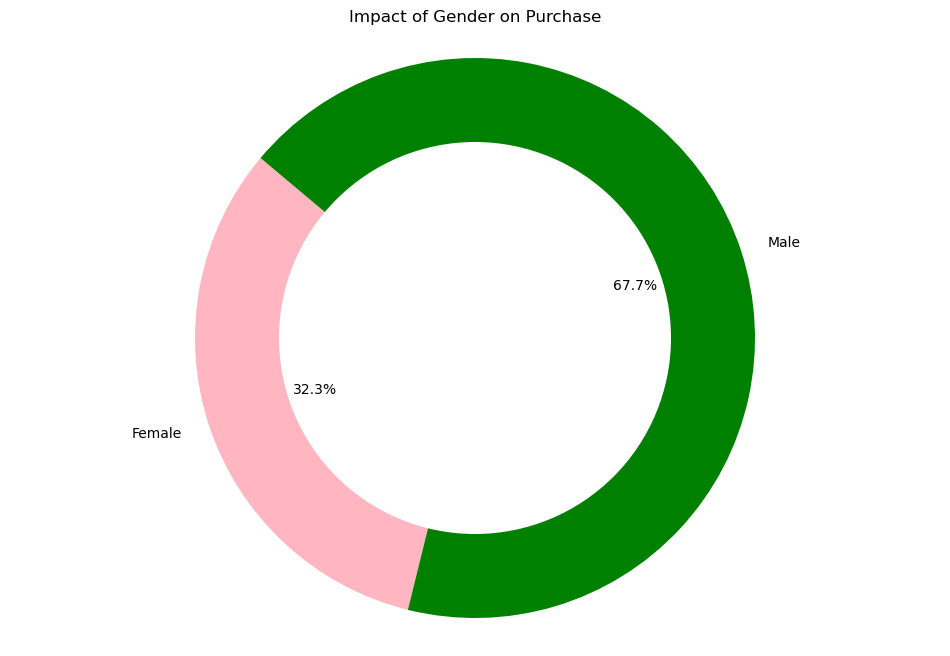

In [83]:

gender_purchase = df.groupby('Gender')['Purchase Amount (USD)'].sum()

# Create a donut chart
fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(gender_purchase, labels=gender_purchase.index, autopct='%1.1f%%', startangle=140, colors=['lightpink', 'green'], wedgeprops=dict(width=0.4))
ax.set_title("Impact of Gender on Purchase")
plt.axis('equal')  # Equal aspect ratio ensures that the chart is drawn as a circle.

# Draw a circle in the center to create a donut chart
center_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(center_circle)

plt.show()

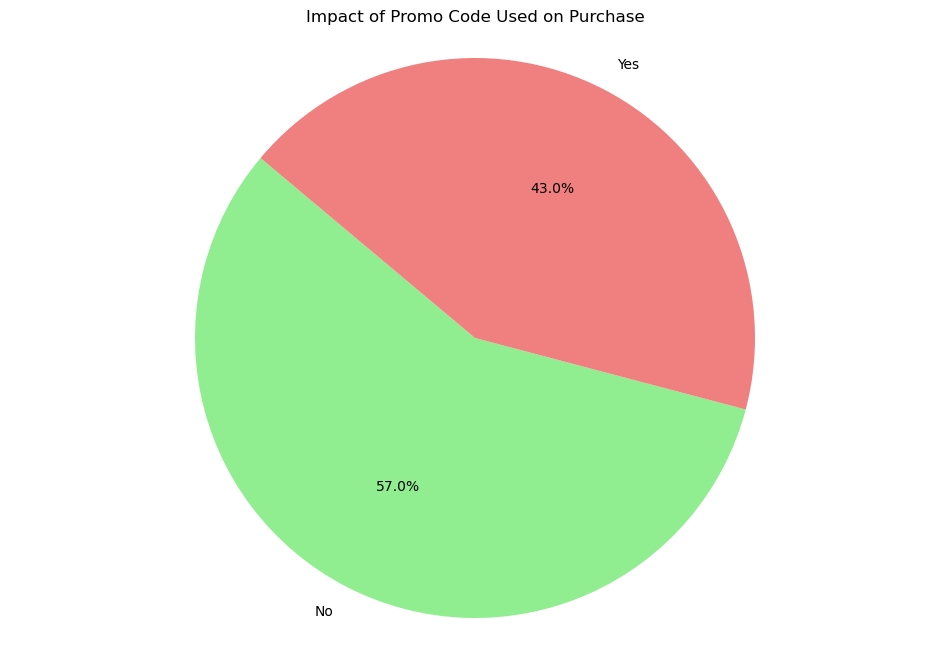

In [84]:

promo_counts = df['Promo Code Used'].value_counts()

# Create a pie chart
plt.figure(figsize=(12, 8))
plt.pie(promo_counts, labels=promo_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title("Impact of Promo Code Used on Purchase")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Text(0, 0.5, 'Purchase Amount (USD)')

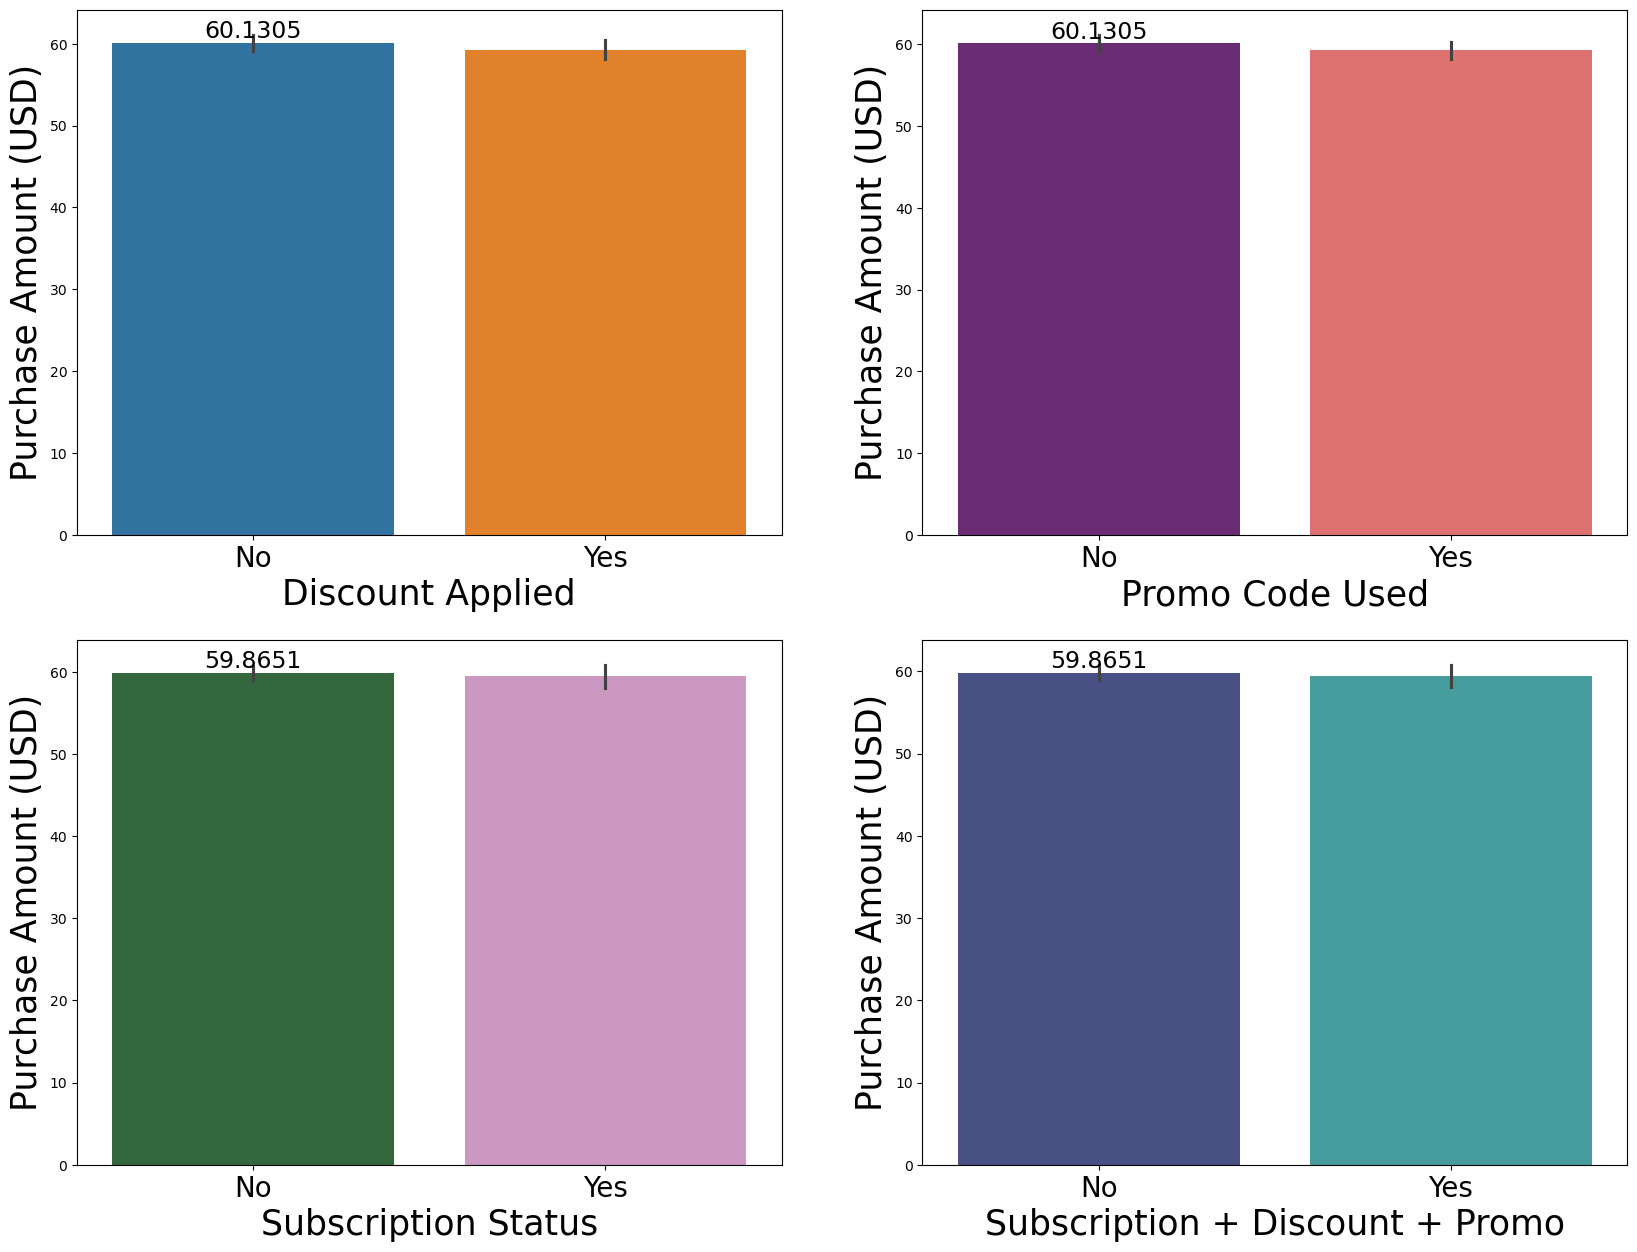

In [85]:
#Let's see what's the average purchase amount of consumers those use(or not) 
#only promo code/discount/subscriptions status and who use all of them 
plt.title("Average purchase amount by gender", fontsize = 30)
plt.ylim([0,100])
fig, axes = plt.subplots(2, 2, figsize =(20,15))
Discount = df['Discount Applied']== 'Yes'
PromoCode = df['Promo Code Used']== 'Yes'
Subscription = df['Subscription Status']== 'Yes'
Alloffers = (df['Discount Applied']== 'Yes') & (df['Promo Code Used'] == 'Yes') & (df['Subscription Status'] == 'Yes')
plot6 = sns.barplot(x = Discount, y =df['Purchase Amount (USD)'], palette ='tab10',ax=axes[0,0])
plt.close(1)
plot6.set_xticklabels(['No','Yes'], fontsize = 20)
plot6.bar_label(plot6.containers[0], fontsize = 17)
plot6.set_xlabel("Discount Applied", fontsize = 25)
plot6.set_ylabel("Purchase Amount (USD)", fontsize = 25)
plot7 = sns.barplot(x = PromoCode, y =df['Purchase Amount (USD)'], palette ='magma',ax=axes[0,1])
plot7.set_xticklabels(['No','Yes'], fontsize = 20)
plot7.bar_label(plot7.containers[0], fontsize = 17)
plot7.set_xlabel("Promo Code Used", fontsize = 25)
plot7.set_ylabel("Purchase Amount (USD)", fontsize = 25)
plot8 = sns.barplot(x = Subscription, y =df['Purchase Amount (USD)'], palette ='cubehelix',ax=axes[1,0])
plot8.set_xticklabels(['No','Yes'], fontsize = 20)
plot8.bar_label(plot8.containers[0], fontsize = 17)
plot8.set_xlabel("Subscription Status", fontsize = 25)
plot8.set_ylabel("Purchase Amount (USD)", fontsize = 25)
plot9 = sns.barplot(x = Alloffers, y =df['Purchase Amount (USD)'], palette ='mako',ax=axes[1,1])
plot9.set_xticklabels(['No','Yes'], fontsize = 20)
plot9.bar_label(plot9.containers[0], fontsize = 17)
plot9.set_xlabel("Subscription + Discount + Promo", fontsize = 25)
plot9.set_ylabel("Purchase Amount (USD)", fontsize = 25)

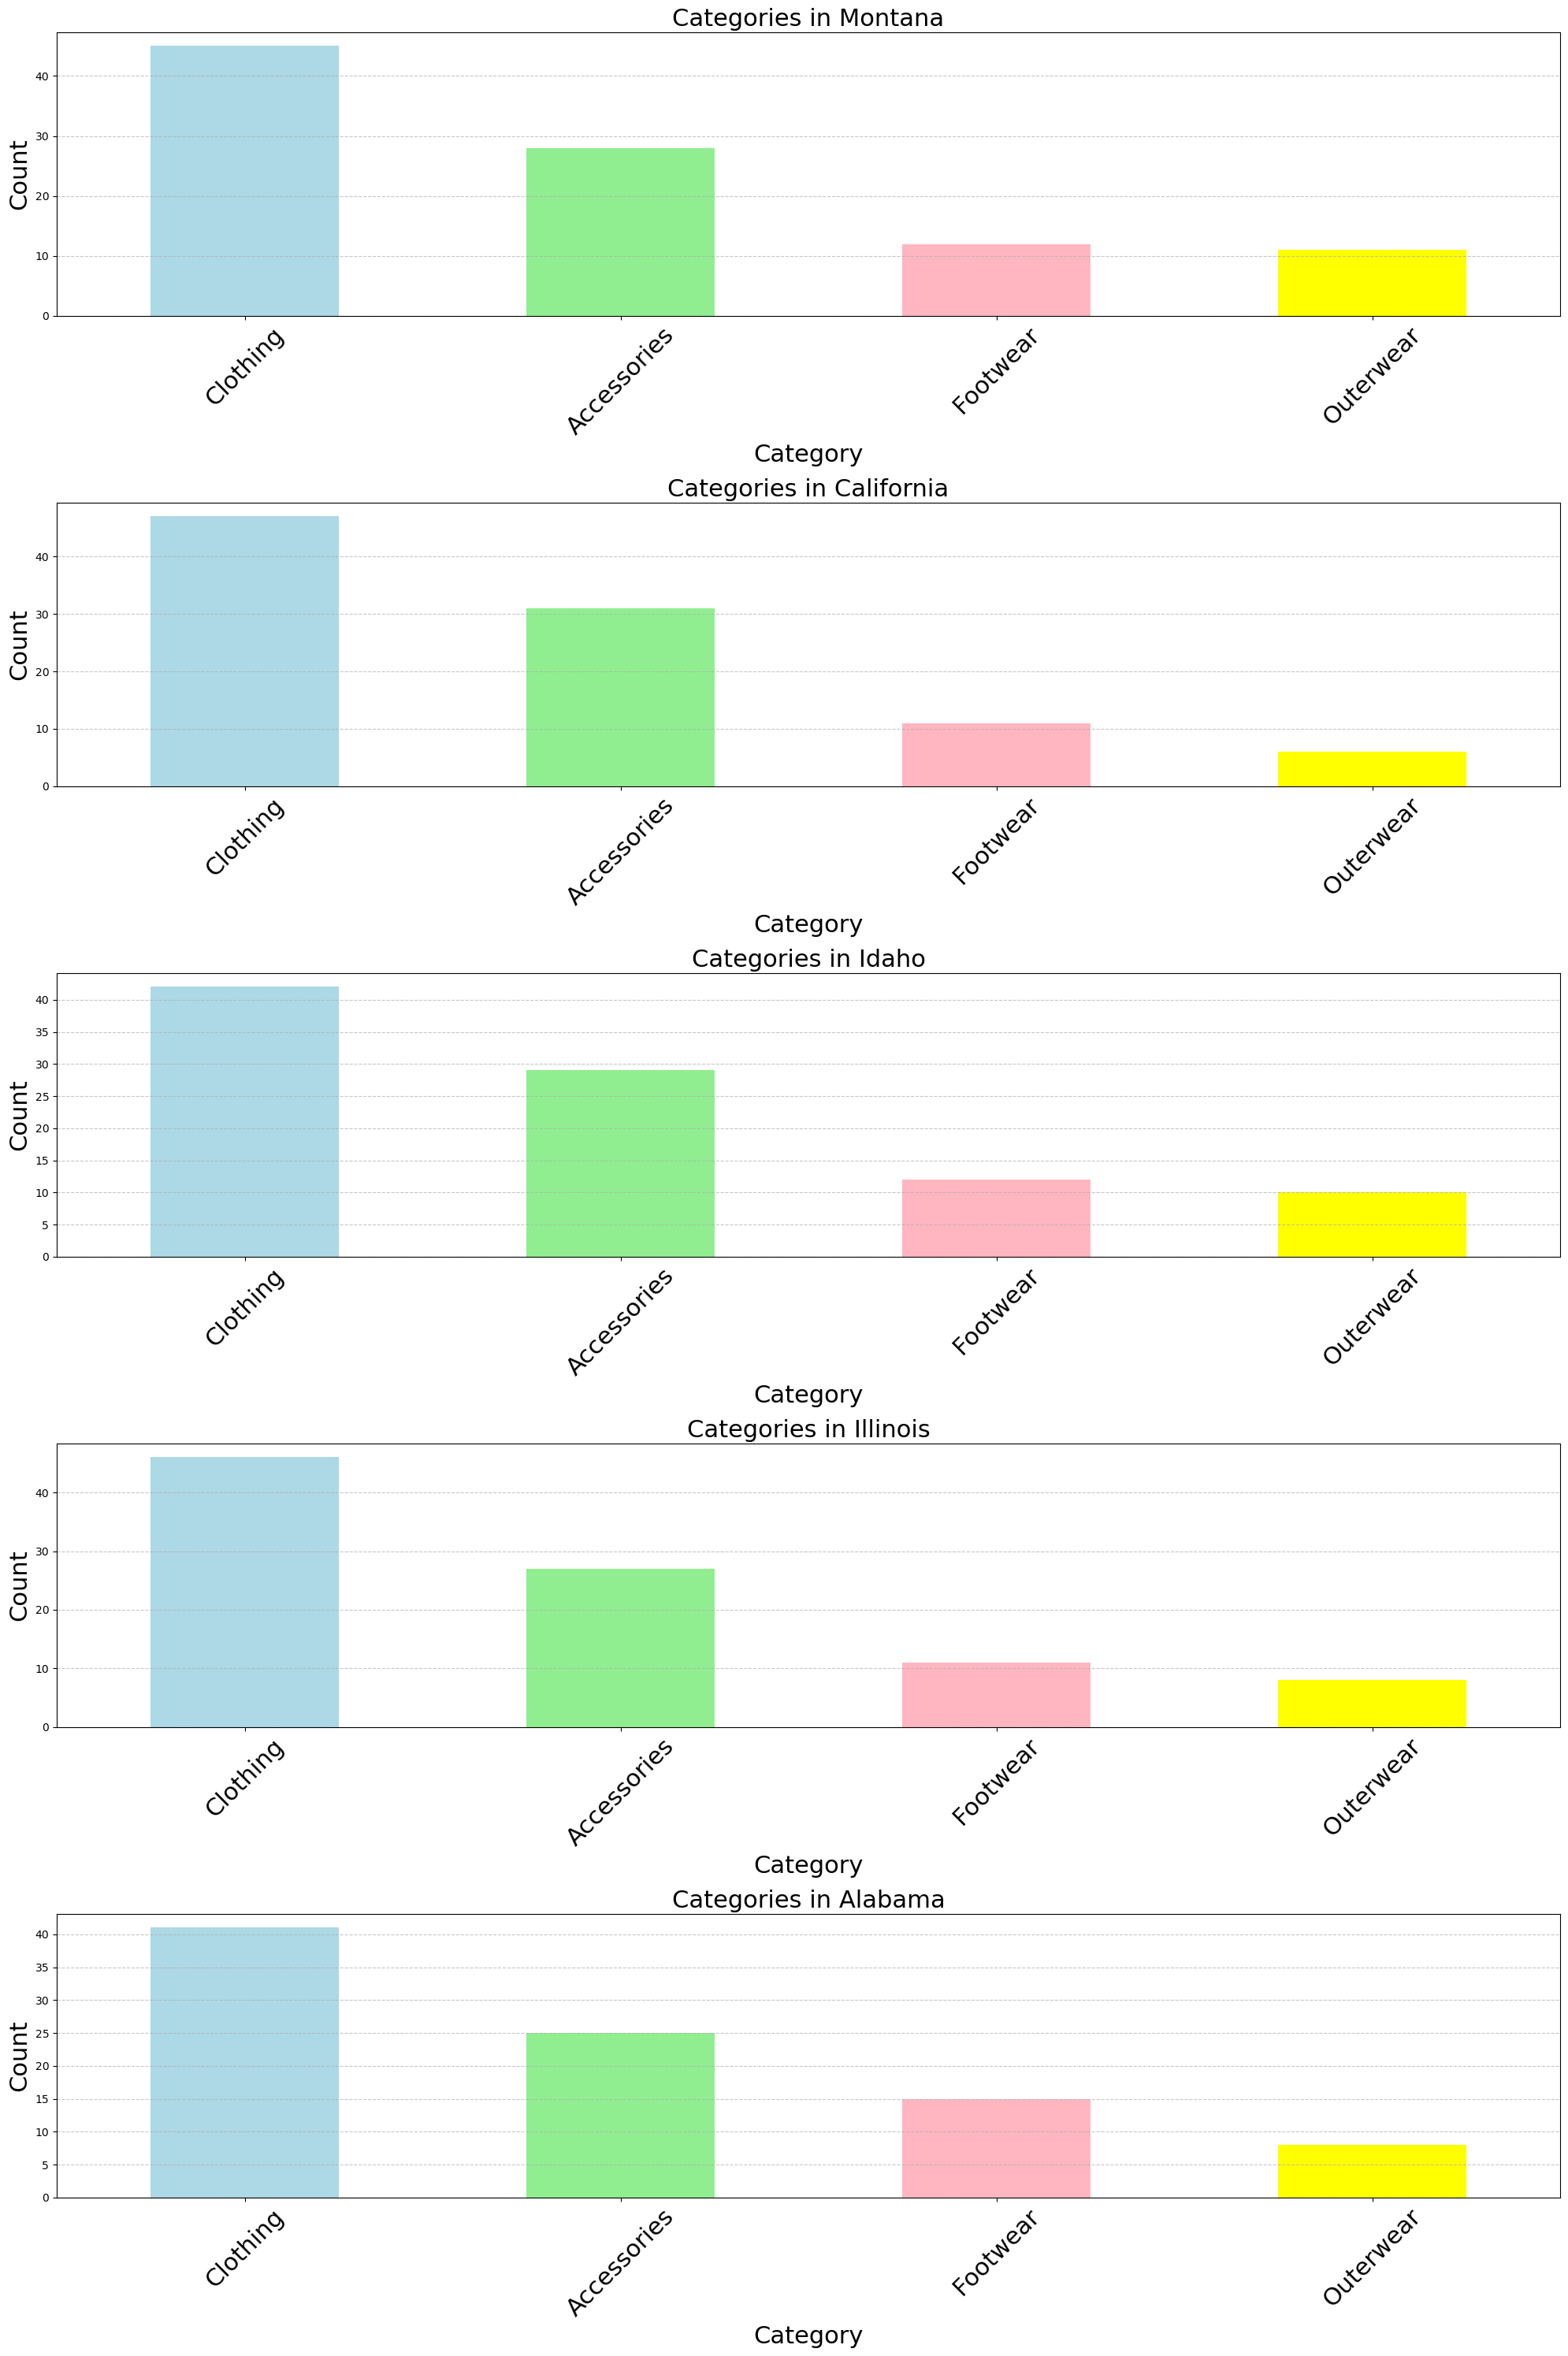

In [86]:
top_locations = df['Location'].value_counts().head(5).index

# Define different colors for bars
colors = ['lightblue','lightgreen','lightpink','yellow','orange']
# Create a subplot grid for each location
fig, axes = plt.subplots(5, 1, figsize=(20, 30))

# Iterate through the top locations and create category distribution plots with different colors
for i, location in enumerate(top_locations):
    location_data = df[df['Location'] == location]
    
    # Count the most common product categories in this location
    category_counts = location_data['Category'].value_counts().head(10)
    
    # Create a bar plot for the category distribution with different colors
    ax = axes[i]
    category_counts.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f"Categories in {location}",fontsize='22')
    ax.set_xlabel("Category",fontsize='22')
    ax.set_ylabel("Count",fontsize='22')
    ax.set_xticklabels(category_counts.index, rotation=45,fontsize='22')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust subplot layout for a clean appearance
plt.tight_layout()

# Display the visualizations
plt.show()

<Axes: >

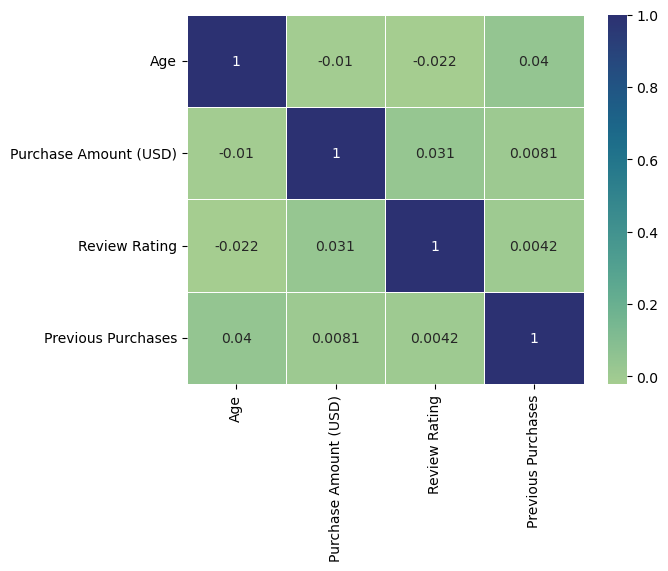

In [87]:
sns.heatmap(df[['Age','Purchase Amount (USD)','Review Rating','Previous Purchases']].corr(), annot=True, cmap='crest',linewidths=0.5)

Feature Encoding

In [88]:
from sklearn.preprocessing import LabelEncoder
for col in cat_col:
    print()
    print(f"#{col}")
    print(f"{col}_encoder=LabelEncoder()")
    print(f"df'{col}']={col}_encoder.fit_transform(df'{col}'])")


#Gender
Gender_encoder=LabelEncoder()
df'Gender']=Gender_encoder.fit_transform(df'Gender'])

#Item Purchased
Item Purchased_encoder=LabelEncoder()
df'Item Purchased']=Item Purchased_encoder.fit_transform(df'Item Purchased'])

#Category
Category_encoder=LabelEncoder()
df'Category']=Category_encoder.fit_transform(df'Category'])

#Location
Location_encoder=LabelEncoder()
df'Location']=Location_encoder.fit_transform(df'Location'])

#Size
Size_encoder=LabelEncoder()
df'Size']=Size_encoder.fit_transform(df'Size'])

#Color
Color_encoder=LabelEncoder()
df'Color']=Color_encoder.fit_transform(df'Color'])

#Season
Season_encoder=LabelEncoder()
df'Season']=Season_encoder.fit_transform(df'Season'])

#Subscription Status
Subscription Status_encoder=LabelEncoder()
df'Subscription Status']=Subscription Status_encoder.fit_transform(df'Subscription Status'])

#Payment Method
Payment Method_encoder=LabelEncoder()
df'Payment Method']=Payment Method_encoder.fit_transform(df'Payment Method'])

#Shipping Ty

In [89]:

#Before Encoding
df[cat_col].head()

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
776,Male,Shirt,Clothing,Alabama,M,Maroon,Spring,Yes,PayPal,Standard,Yes,Yes,Venmo,Every 3 Months
1664,Male,Handbag,Accessories,Minnesota,M,Purple,Spring,No,PayPal,Next Day Air,Yes,Yes,PayPal,Weekly
1277,Male,Blouse,Clothing,Rhode Island,L,Green,Spring,No,Debit Card,Express,Yes,Yes,Venmo,Quarterly
2632,Male,Scarf,Accessories,Alaska,M,Black,Fall,No,Venmo,Next Day Air,No,No,Cash,Annually
965,Male,Boots,Footwear,Delaware,L,Black,Spring,Yes,Debit Card,Store Pickup,Yes,Yes,Credit Card,Annually


In [90]:
#Gender
Gender_encoder=LabelEncoder()
df['Gender']=Gender_encoder.fit_transform(df['Gender'])

#Item Purchased
Item_Purchased_encoder=LabelEncoder()
df['Item Purchased']=Item_Purchased_encoder.fit_transform(df['Item Purchased'])

#Category
Category_encoder=LabelEncoder()
df['Category']=Category_encoder.fit_transform(df['Category'])

#Location
Location_encoder=LabelEncoder()
df['Location']=Location_encoder.fit_transform(df['Location'])

#Size
Size_encoder=LabelEncoder()
df['Size']=Size_encoder.fit_transform(df['Size'])

#Color
Color_encoder=LabelEncoder()
df['Color']=Color_encoder.fit_transform(df['Color'])

#Season
Season_encoder=LabelEncoder()
df['Season']=Season_encoder.fit_transform(df['Season'])

#Subscription Status
Subscription_Status_encoder=LabelEncoder()
df['Subscription Status']=Subscription_Status_encoder.fit_transform(df['Subscription Status'])

#Shipping Type
Shipping_Type_encoder=LabelEncoder()
df['Shipping Type']=Shipping_Type_encoder.fit_transform(df['Shipping Type'])
#Discount Applied
Discount_Applied_encoder=LabelEncoder()
df['Discount Applied']=Discount_Applied_encoder.fit_transform(df['Discount Applied'])

#Promo Code Used
Promo_Code_Used_encoder=LabelEncoder()
df['Promo Code Used']=Promo_Code_Used_encoder.fit_transform(df['Promo Code Used'])

#Payment Method
Payment_Method_encoder=LabelEncoder()
df['Preferred Payment Method']=Payment_Method_encoder.fit_transform(df['Preferred Payment Method'])

#Frequency of Purchases
Frequency_of_Purchases_encoder=LabelEncoder()
df['Frequency of Purchases']=Frequency_of_Purchases_encoder.fit_transform(df['Frequency of Purchases'])

#Frequency of Purchases
Frequency_of_Purchases_encoder=LabelEncoder()
df['Payment Method']=Frequency_of_Purchases_encoder.fit_transform(df['Payment Method'])

In [91]:
df[cat_col].sample(5)

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
806,1,11,1,8,0,4,2,1,2,4,1,1,4,5
2398,1,10,3,8,1,14,3,0,4,2,0,0,0,3
3176,0,14,2,3,3,21,1,0,1,0,0,0,2,4
1469,1,12,0,23,1,17,3,0,3,4,1,1,4,2
2975,0,15,0,9,3,10,3,0,4,0,0,0,1,2


Scaling

In [92]:
#Before Scaling
df[num_col].head()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
776,49,60,5.0,8
1664,19,53,5.0,35
1277,19,97,5.0,5
2632,24,27,5.0,14
965,43,55,5.0,10


In [93]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
for col in num_col:
    print()
    print(f"#{col}")
    print(f"{col}_scaler=StandardScaler()")
    print(f"df['{col}']={col}_scaler.fit_transform(np.array(df['{col}'])).reshape(len(df['{col}']),1)")
    


#Age
Age_scaler=StandardScaler()
df['Age']=Age_scaler.fit_transform(np.array(df['Age'])).reshape(len(df['Age']),1)

#Purchase Amount (USD)
Purchase Amount (USD)_scaler=StandardScaler()
df['Purchase Amount (USD)']=Purchase Amount (USD)_scaler.fit_transform(np.array(df['Purchase Amount (USD)'])).reshape(len(df['Purchase Amount (USD)']),1)

#Review Rating
Review Rating_scaler=StandardScaler()
df['Review Rating']=Review Rating_scaler.fit_transform(np.array(df['Review Rating'])).reshape(len(df['Review Rating']),1)

#Previous Purchases
Previous Purchases_scaler=StandardScaler()
df['Previous Purchases']=Previous Purchases_scaler.fit_transform(np.array(df['Previous Purchases'])).reshape(len(df['Previous Purchases']),1)


In [94]:
#Age
Age_scaler=StandardScaler()
df['Age']=Age_scaler.fit_transform(np.array(df['Age']).reshape(len(df['Age']),1))


#Purchase Amount (USD)
Purchase_Amount_USD_scaler=StandardScaler()
df['Purchase Amount (USD)']=Purchase_Amount_USD_scaler.fit_transform(np.array(df['Purchase Amount (USD)']).reshape(len(df['Purchase Amount (USD)']),1))

#Review Rating
Review_Rating_scaler=StandardScaler()
df['Review Rating']=Review_Rating_scaler.fit_transform(np.array(df['Review Rating']).reshape(len(df['Review Rating']),1))

#Previous Purchases
Previous_Purchases_scaler=StandardScaler()
df['Previous Purchases']=Previous_Purchases_scaler.fit_transform(np.array(df['Previous Purchases']).reshape(len(df['Previous Purchases']),1))


In [95]:
df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
776,0.324323,1,16,1,0.009950,0,1,12,1,1.745562,1,4,4,1,1,-1.201191,5,2
1664,-1.648629,1,7,0,-0.285629,22,1,17,1,1.745562,0,4,3,1,1,0.667932,4,6
1277,-1.648629,1,2,1,1.572295,38,0,8,1,1.745562,0,3,1,1,1,-1.408872,5,5
2632,-1.319804,1,15,0,-1.383492,1,1,1,0,1.745562,0,5,3,0,0,-0.785831,1,0
965,-0.070267,1,3,2,-0.201178,7,0,1,1,1.745562,1,3,5,1,1,-1.062738,2,0


In [96]:
wcss=[]
from sklearn.cluster import KMeans
#Finding number of clusters
for i in range(1,21):
    model=KMeans(n_clusters=i)
    model.fit(df)
    wcss.append(model.inertia_)

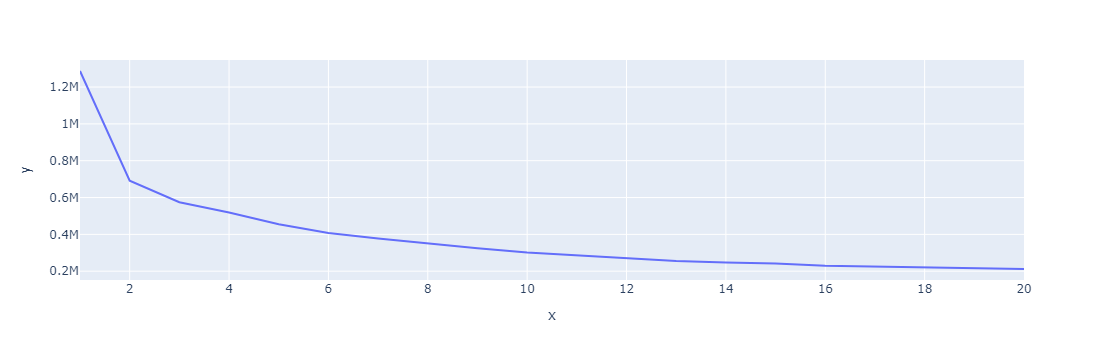

In [97]:
fig=px.line(x=range(1,21),y=wcss)
fig.show()